# Project 90 dataset

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import pystan as ps
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
from networkx.drawing.nx_pydot import graphviz_layout
import arviz as az
sns.set()

In [3]:
rds_b = pickle.load(open('../models/prevalence_estimation/pickles/RDS_B_estimator.pkl', 'rb')) 
rds_model = pickle.load(open('../models/primary_model/pickles/rds_imperfect_test_v5.pkl', 'rb'))

In [7]:
data_project90 = pd.read_csv('../data/Princeton_project_90/nodes.tsv', sep='\t')
edges_project90 = pd.read_csv('../data/Princeton_project_90/edges.tsv', sep='\t')

In [50]:
G = nx.Graph()
for i, edge in edges_project90.iterrows():
    G.add_node(edge['node1'], data=data_project90[data_project90.id == edge['node1']])
    G.add_node(edge['node2'], data=data_project90[data_project90.id == edge['node2']])
    G.add_edge(edge['node1'], edge['node2'])
components = list(nx.connected_components(G))
G = G.subgraph(components[0])

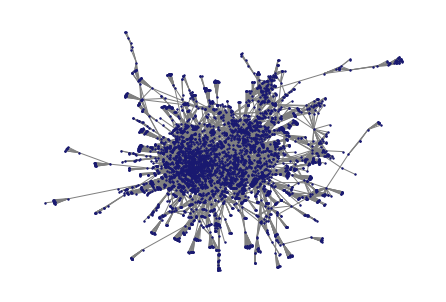

In [55]:
nx.draw(G, node_size=2, node_color='midnightblue', edge_color='grey')
plt.show()